<a href="https://colab.research.google.com/github/klajosw/python/blob/master/kl_py_jupiternb_muvelek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="left"> 
    <img src="https://raw.githubusercontent.com/klajosw/python/master/kl_mie_python_logo_250.jpg" 
         align="left" width="251" height="251">
    
</p>


<p> </p>



# Python alapok JupiterNoteBook használata

<https://klajosw.blogspot.com/>


---

# JupyterNoteBook



Jupyter notebooks valójában JSON files, amely állomáyn kizerjesztése `.ipynb`
Ezt a formátumot könnyen konvertálhetjuk  HTML, PDF, ... formátumba
A formátum megengedi a képek, táblázatok, grafikonok beágyazását is.


### Cella típusai
 - code cell: Python/R/Lua/etc. program nyel kód értelmező
 - raw cell: nyers szöveg
 - markdown cell: formászot szovegek, dokumetumok Markdown jelőléssel
 
## Parancs mód és szerkesztési mód
A Jupyternek két módja van: parancs mód és szerkesztési mód

 - Parancs mód: nem szerkesztési műveletek végrehajtása a kiválasztott cellákban (egynél több cellát is kiválaszthat)
     A kiválasztott cellákat kék színű keretező jelöli
     
 - Szerkesztés mód: egyetlen cella szerkesztése lehet egyszerre, a szerkeszteni kívánt cella zöld színű keret jellőli
 
 
 
### Váltás az üzemmódok között
 - Esc: Szerkesztés mód -> Parancs mód
 - Belépés vagy dupla kattintás: Parancs mód -> Szerkesztés mód
 
 
 
###  Cella tartalom futtatása
Ctrl + Enter: Cella tartalom futtatás
Shift + Enter: Cella tartalom futtatás és következő cellába lépés
Alt + Enter: Cella tartalom futtatás és új cella beszúrás 


### Cellák mágikus parancsai

Különleges parancsok módosíthatják például az egyes cellák viselkedését
%  kezdetű : sorra vonatkozó, sor érvényességű
%% kezdetű : egész cella érvényességű
 
 
#### Mágikus parancsok listázása:
`%lsmagic`

 ---

In [0]:
%%time

for x in range(200000):
    pass



Wall time: 7.98 ms


In [0]:
%%timeit

x = 3

15.4 ns ± 2.07 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


In [0]:
%%writefile hello.py
# fájlba kiírás
print("Hello world from klajosw")

Overwriting hello.py


In [0]:
## mágikus parancsok listája
%lsmagic

Available line magics:
%R  %Rdevice  %Rget  %Rpull  %Rpush  %alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%R  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%m

---

## A motorháztető alatt azt látnánk, hogy

 - mindegyik notebookot a saját Kernel működteti (Python interpreter)
 - a kernel megszakítható vagy újraindítható a Kernel menüben
 - érdemes mindig futtatni a `Kernel -> Restart & All` minden publikálás elött, és ellenőrizzük,
    hogy a notebook a várt módon viselkedik
 - az összes cellának egy névtere van, tehát egymás változóit, foggványeit, moduljait elérik, használhatják.
 - a cellákat tetszőleges sorrendben lehet futtatni, a végrehajtás száma igényszerint
 
 
###  A kódcellák be- és kimenete elérhető

 - Előző kimenet:  `_`

- Előzőt megelőző kimenet:  `__`
    
    
---    

In [0]:
'első kiírt szöveg'

'első kiírt szöveg'

In [0]:
"második kiírt szöveg"

'második kiírt szöveg'

In [0]:
__

'első kiírt szöveg'

In [0]:
__

'első kiírt szöveg'

---

####  Az N-edik kimenet _kimenetszáma  változóként is elérhető. _31
De ez csak akkor határozható, ha az N-edik cella rendelkezik kimenettel.



---

In [0]:
_31 ## 31 kód cella kiírása (In[31])  ## tartalma : 'első kiírt szöveg'

'első kiírt szöveg'

In [0]:
## Progszam szerkezettel így sorolhatjuk fel az összes definiált kimenetet:
    
list(filter(lambda x: x.startswith('_') and  x[1:].isdigit(),  globals()))

['_11',
 '_15',
 '_16',
 '_18',
 '_19',
 '_20',
 '_21',
 '_22',
 '_23',
 '_24',
 '_25',
 '_26',
 '_27',
 '_28',
 '_29',
 '_30',
 '_31',
 '_32',
 '_33',
 '_34',
 '_36',
 '_37',
 '_38',
 '_39',
 '_40',
 '_46',
 '_47',
 '_48',
 '_49',
 '_50',
 '_51']

---

### Az N-edik bemenet _ibemenetszáma változóként is elérhető. _i53
De ez csak akkor határozható, ha az N-edik cella létezik.

Az előző bemenet értéke a `_i` -vel érhető el

---

In [0]:
_i53

"_31 ## 31 kód cella kiírása (In[31])  ## tartalma : 'első kiírt szöveg'"

In [0]:
_i   

'_i53'

In [0]:
#####         Python2 nyelv elérése // cella szint
%%python2
## értelmező átváltása ha létezik
print 12, 3

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(12, 3)? (<ipython-input-90-a78bb5a08062>, line 4)

---

## R nyelv használata

---

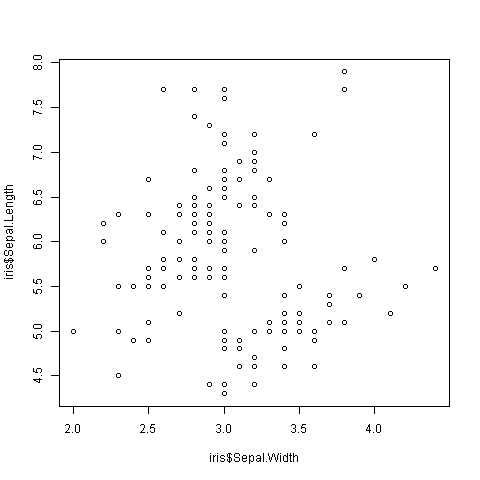

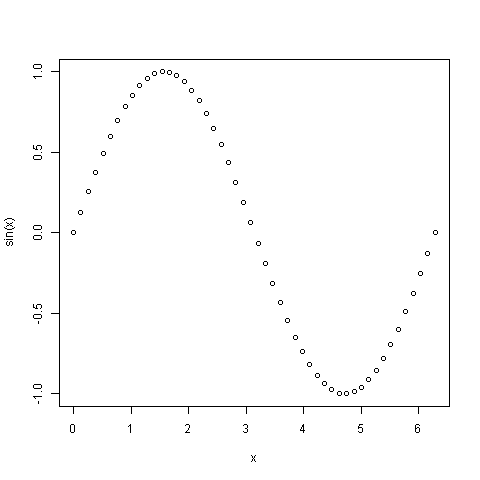

array([49.])

In [0]:
#####         R nyelv elérése // sor szint
## %load_ext rpy2.ipython 
## Ez csak egyszerkell futtatni (osztály betöltés) FIGYI : Load sorba nem lehet semmi más még megjegyzés sem

## Iris diagram
%R plot(iris$Sepal.Width, iris$Sepal.Length)



##%R c <- 1:2
##%R d <- 1:3
## %R print( c(c,d) )

## Szinus görbe kirajzolása
%R x <- seq(0, 2*pi, length.out=50)
%R plot(x, sin(x))

%R a <- 50                    ## változó beállitása
%R b <- -1                    ## változó beállitása
%R print(a+b)                 ## kiiratás



In [0]:
## ---------------------------  Tömb kezelés
%R c <- 1:2
%R d <- 1:3
%R print(c(c,d) )



array([1, 2, 1, 2, 3], dtype=int32)

In [0]:
## ---------------------------- Vectorok
%R vektor <- c(1, 2, 3, 10, 100) 
%R print(vektor)                    ## 1   2   3  10 100



array([  1.,   2.,   3.,  10., 100.])

In [0]:
# figyelmeztető üzenet elnyomása, ha van
import warnings
warnings.filterwarnings('ignore')

#--- elemek  2x3 mátrixba töltése
%R mat <- matrix(c(1, 2, 3, 4, 5, 6), nrow = 3) 
%R print(mat )



array([[1., 4.],
       [2., 5.],
       [3., 6.]])

In [0]:
## ---------------------------- transzláció (sor és oszlop felcserlése)
%R mat <- matrix(c(1, 2, 3, 4, 5, 6), nrow = 2) 
%R print(t(mat))             

array([[1., 2.],
       [3., 4.],
       [5., 6.]])

In [0]:
%R print(nchar("hello"))      # 5 


array([5], dtype=int32)

---

## javascript használata

Cellaszintű mágikus parancs:
`%%javascript`  vagy `%%js`

---

In [0]:
%%javascript
element.text("Én már " +58 + " éves leszek idén.")


<IPython.core.display.Javascript object>

In [0]:
%%js
element.text("1" + 1)

<IPython.core.display.Javascript object>

---

## HTML megjelenítés

---

In [0]:
%%HTML  
<body>
<h2>lajos</h2>
Ittvagyok
</br>
és itt is
</body>


---

## SVG megjelenítés

---

In [0]:
%%SVG 
<svg>
<ellipse style="fill:#00ff00;stroke:#000000;" cx="50" cy="50" rx="48" ry="48">
</ellipse>
</svg>



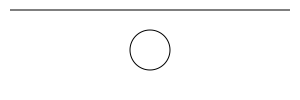

In [0]:
%%SVG 
<svg width="300" height="100" xmlns="http://www.w3.org/2000/svg">
<line x1="10" y1="10" x2="290" y2="10" style="stroke:#000">
</line>
<ellipse cx="150" cy="50" rx="20" ry="20" style="stroke:#000;fill:none;">
</ellipse>
</svg>

In [0]:
%%python2

import sys
import math

max_i = sys.maxint
print(max_i, math.log(max_i, 2))

Couldn't find program: 'python2'


---

## Az egyes algoritmusok gyorsaságának vizsgálata

`%%timeit` mágikus parancs használatával

---

In [0]:
import urllib.request
from collections import defaultdict, Counter

wp_url = "https://en.wikipedia.org/wiki/Budapest"
text = urllib.request.urlopen(wp_url).read().decode('utf8')
words = text.split()

In [0]:
%%timeit
word_freq = {}
for word in words:
    if word not in word_freq:
        word_freq[word] = 1
    else:
        word_freq[word] += 1

6.63 ms ± 302 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [0]:
%%timeit
word_freq = {}
for word in words:
    try:
        word_freq[word] += 1
    except KeyError:
        word_freq[word] = 1

9.66 ms ± 740 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [0]:
%%timeit
word_freq = {}
for word in words:
    word_freq.setdefault(word, 0)
    word_freq[word] += 1

9.58 ms ± 1.14 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [0]:
%%timeit
word_freq = defaultdict(int)
for word in words:
    word_freq[word] += 1

8.64 ms ± 1.29 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [0]:
%%timeit
word_freq = Counter(words)

3.68 ms ± 96.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [0]:
## első 20 találat megjelenítése
for word, freq in sorted(word_freq.items(), key=lambda x: -x[1])[:20]:
    print(word, freq)

the 1247
<a 1246
of 1101
and 705
in 674
<span 575
class="external 343
text" 341
rel="nofollow" 330
<li><a 324
<li 319
class="reference"><a 304
</li> 270
– 269
is 244
rel="mw-deduplicated-inline-style" 242
class="citation 238
class="Z3988"></span><link 238
class="mw-cite-backlink"><b><a 236
class="reference-text"><cite 234
